# TIME SERIES APPROCHE STATISTIQUE

## Objets perdus uniquement (pas de features extérieures)

In [78]:
import pandas as pd

In [79]:
data = pd.read_csv('../data_cleaned.csv')

In [80]:
data.head(1)

,date,restitution_date,gare,nature,type,nom,year,month,week,day,day_of_week,number
0,2016-12-31,NaN,Lille Europe,Chéquier,"Porte-monnaie / portefeuille, argent, titres",Objet trouvé,2016,12,52,31,Samedi,1


In [81]:
data.drop(['restitution_date','nom', 'gare', 'type', 'nature'], axis=1, inplace=True)

In [82]:
data.head(1)

,date,year,month,week,day,day_of_week,number
0,2016-12-31,2016,12,52,31,Samedi,1


In [83]:
data_grouped = data.groupby(['date', 'year', 'month', 'week', 'day', 'day_of_week']).sum().reset_index()

In [84]:
data_grouped

,date,year,month,week,day,day_of_week,number
0,2016-01-01,2016,1,53,1,Vendredi,1
1,2016-01-02,2016,1,53,2,Samedi,8
2,2016-01-03,2016,1,53,3,Dimanche,8
3,2016-01-04,2016,1,1,4,Lundi,12
4,2016-01-05,2016,1,1,5,Mardi,4
...,...,...,...,...,...,...,...
2444,2022-12-29,2022,12,52,29,Jeudi,13
2445,2022-12-30,2022,12,52,30,Vendredi,10
2446,2022-12-31,2022,12,52,31,Samedi,5
2447,2023-01-01,2023,1,52,1,Dimanche,4


In [85]:
data_grouped = data_grouped.loc[data_grouped['year']<=2022]

In [86]:
# Approche pmdarima

In [87]:
data_grouped.head(-5)

,date,year,month,week,day,day_of_week,number
0,2016-01-01,2016,1,53,1,Vendredi,1
1,2016-01-02,2016,1,53,2,Samedi,8
2,2016-01-03,2016,1,53,3,Dimanche,8
3,2016-01-04,2016,1,1,4,Lundi,12
4,2016-01-05,2016,1,1,5,Mardi,4
...,...,...,...,...,...,...,...
2437,2022-12-22,2022,12,51,22,Jeudi,4
2438,2022-12-23,2022,12,51,23,Vendredi,11
2439,2022-12-24,2022,12,51,24,Samedi,4
2440,2022-12-25,2022,12,51,25,Dimanche,3


In [88]:
data_grouped_month = data_grouped[['year', 'month', 'number']].groupby(['year', 'month']).sum().reset_index()
data_grouped_week = data_grouped[['year', 'week', 'number']].groupby(['year', 'week']).sum().reset_index()

In [89]:
data_grouped_month.head(5)

,year,month,number
0,2016,1,310
1,2016,2,291
2,2016,3,321
3,2016,4,342
4,2016,5,321


In [90]:
data_grouped_week.head(5)

,year,week,number
0,2016,1,60
1,2016,2,76
2,2016,3,77
3,2016,4,80
4,2016,5,74


In [91]:
import pmdarima as pm
import matplotlib.pyplot as plt

In [92]:
# Day

In [93]:
model_arima_day = pm.auto_arima(data_grouped['number'], start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14329.974, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15155.120, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14927.188, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14993.396, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18468.730, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14330.398, Time=1.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14330.136, Time=2.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=14926.918, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14815.037, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14329.754, Time=2.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14324.985, Time=2.87 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14326.616, Time=2.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=14321.722, Time=4.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14324.529, Time=3.00 sec
 ARIMA(3,0,3)(0,0,0

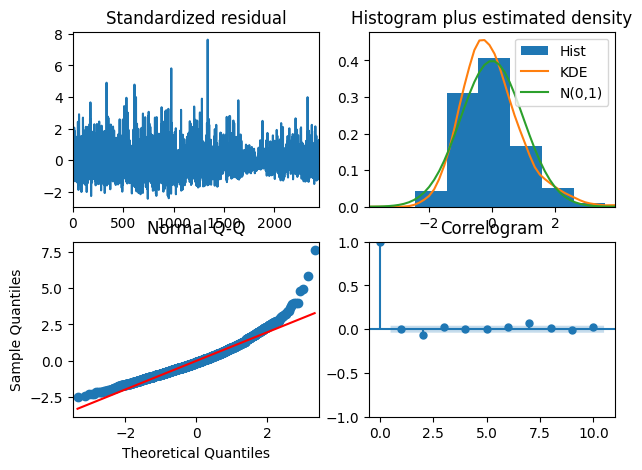

In [94]:
model_arima_day.plot_diagnostics(figsize=(7,5))
plt.show()

In [95]:
# Meilleurs paramètres pour SARIMA day: p=3, d=0, q=3, P=0, D=0, Q=0, m=0

In [96]:
# Month 

In [97]:
model_arima_month = pm.auto_arima(data_grouped_month['number'], start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=869.146, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=875.320, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=872.733, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=869.761, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=873.355, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=870.988, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=870.969, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=869.077, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=870.971, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=872.883, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=867.244, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=867.847, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=869.159, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=869.158, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=867.3

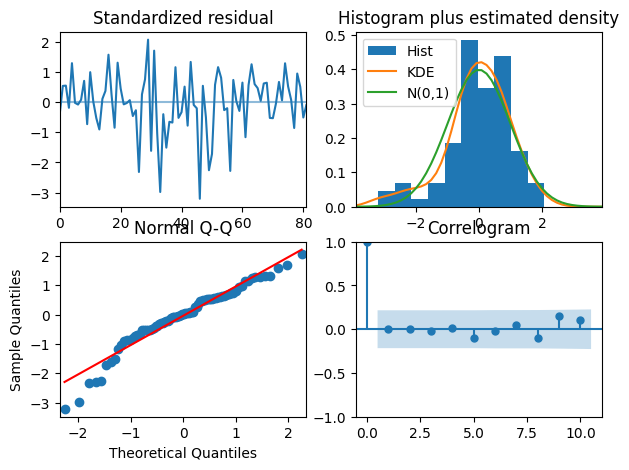

In [98]:
model_arima_month.plot_diagnostics(figsize=(7,5))
plt.show()

In [99]:
# Meilleurs paramètres pour SARIMA month: p=0, d=1, q=2, P=0, D=0, Q=0, m=0

In [100]:
# Week

In [101]:
model_arima_week = pm.auto_arima(data_grouped_week['number'], start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3, 
                      m=1,              
                      d=None,           
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2911.252, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3025.275, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2948.393, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2915.460, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3023.275, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2905.911, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2934.679, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2907.613, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2907.690, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2907.130, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2930.706, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2909.736, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2904.091, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2909.351, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]          

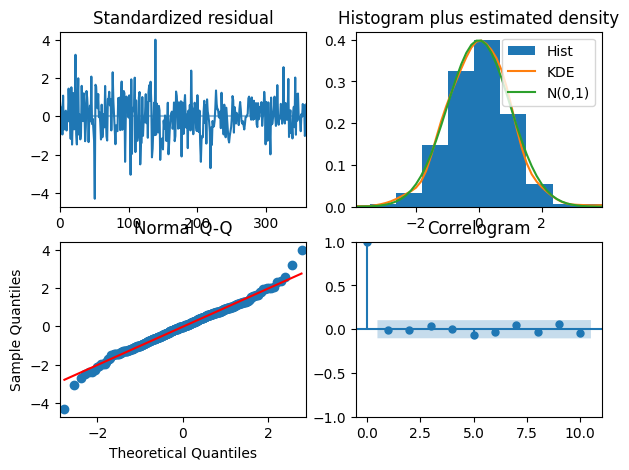

In [102]:
model_arima_week.plot_diagnostics(figsize=(7,5))
plt.show()

In [103]:
# Meilleurs paramètres pour SARIMA week: p=2, d=1, q=1, P=0, D=0, Q=0, m=0

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [105]:
# Day

In [106]:
model_statsmodel_day = SARIMAX(data_grouped["number"], order=(3, 0, 3), seasonal_order=(0, 0, 0, 365), trend='ct', enforce_invertibility=False)

In [107]:
results = model_statsmodel_day.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                 2447
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -7227.001
Date:                Wed, 04 Jan 2023   AIC                          14472.001
Time:                        11:56:55   BIC                          14524.225
Sample:                             0   HQIC                         14490.981
                               - 2447                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4386      1.036      4.285      0.000       2.408       6.469
drift         -0.0012      0.000     -4.190      0.000      -0.002      -0.001
ar.L1          0.2376      0.237      1.000      0.317      -0.228       0.703
ar.L2          0.0412      0.244      0.169      0.866      -0.437       0.520
ar.L3          0.3903      0.219      1.781      0.075      -0.039       0.820
ma.L1         -0.1432      0.241     -0.594      0.552      -0.616       0.329
ma.L2          0.0090      0.241      0.037      0.970      -0.463       0.481
ma.L3         -0.2809      0.204     -1.380      0.168      -0.680       0.118
sigma2        20.7994      0.451     46.126      0.000      19.916      21.683
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):              1256.98
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
# Week

In [109]:
model_statsmodel_week = SARIMAX(data_grouped_week["number"], order=(2, 1, 1), seasonal_order=(0, 0, 0, 53), trend='ct', enforce_invertibility=False)

In [110]:
results = model_statsmodel_week.fit()
results.summary()

c:\Users\Apprenant\anaconda3\envs\time_series\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                  360
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1448.015
Date:                Wed, 04 Jan 2023   AIC                           2908.030
Time:                        11:56:56   BIC                           2931.330
Sample:                             0   HQIC                          2917.296
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0371      0.137     -0.272      0.786      -0.305       0.231
drift      -4.137e-05      0.001     -0.054      0.957      -0.002       0.001
ar.L1          0.2599      0.062      4.209      0.000       0.139       0.381
ar.L2          0.1716      0.061      2.831      0.005       0.053       0.290
ma.L1         -0.9054      0.038    -23.825      0.000      -0.980      -0.831
sigma2       188.6508     11.071     17.041      0.000     166.953     210.349
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.22
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
# Month

In [112]:
model_statsmodel_month = SARIMAX(data_grouped_month["number"], order=(0, 1, 2), seasonal_order=(0, 0, 0, 12), trend='ct', enforce_invertibility=False)

In [113]:
results = model_statsmodel_month.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 number   No. Observations:                   83
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -430.530
Date:                Wed, 04 Jan 2023   AIC                            871.060
Time:                        11:56:56   BIC                            883.093
Sample:                             0   HQIC                           875.891
                                 - 83                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6495      6.473     -0.255      0.799     -14.337      11.038
drift          0.0147      0.152      0.097      0.923      -0.283       0.312
ma.L1         -0.3308      0.121     -2.724      0.006      -0.569      -0.093
ma.L2         -0.1833      0.103     -1.783      0.075      -0.385       0.018
sigma2      2121.2848    310.872      6.824      0.000    1511.987    2730.583
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.82
Prob(H) (two-sided):                  0.91   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""